<a href="https://colab.research.google.com/github/u6k/ml-sandbox/blob/master/mnist_use_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- keras/mnist_mlp.py at master · keras-team/keras https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py
- kerasのmnistのサンプルを読んでみる - Qiita https://qiita.com/ash8h/items/29e24fc617b832fba136

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# fitting
import time
start = time.time()

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

elapsed_time = time.time() - start
print("elapsed_time: {0}".format(elapsed_time))

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)          

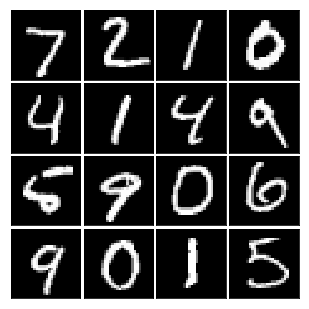

In [0]:
import matplotlib.pyplot as plt

W = 4
H = 4
fig = plt.figure(figsize=(H, W))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.0, hspace=0.05, wspace=0.05)
for i in range(W*H):
  ax = fig.add_subplot(H, W, i + 1, xticks=[], yticks=[])
  ax.imshow(x_test[i].reshape((28, 28)), cmap='gray')

plt.show()

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix

import time
start = time.time()

result = model.predict_classes(x_test[0:16,], batch_size=32)

elapsed_time = time.time() - start

print(result)

print("elapsed_time: {0}".format(elapsed_time))

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5]
